#**TP3**

Travaux pratiques 3 -- IFT 599/799

Présenté par :
- Laetitia Meuleghe KENMEGNE -- MEUL1401
- Raphaël TURCOTTE -- TURR3004
- M. J. Friedman COUTHON -- COUM3028

In [1]:
!pip install umap-learn
!pip install graphviz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **1- Diagramme en bâton illustrant le nombre de films que l’on a par genre.**

In [4]:
#Lecture du jeu de données
df=pd.read_csv("/content/drive/MyDrive/TP Sciences des Données/TP3/movies.csv")
df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [5]:
# Séparer les genres en liste
df['genres'] = df['genres'].apply(lambda x: x.split('|'))
df

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
62418,209157,We (2018),[Drama]
62419,209159,Window of the Soul (2001),[Documentary]
62420,209163,Bad Poems (2018),"[Comedy, Drama]"
62421,209169,A Girl Thing (2001),[(no genres listed)]


In [6]:
# Filtrer les films avec le genre 'no genres listed'
df_filtered = df[~df['genres'].apply(lambda x: '(no genres listed)' in x)]
df_filtered

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
62417,209155,Santosh Subramaniam (2008),"[Action, Comedy, Romance]"
62418,209157,We (2018),[Drama]
62419,209159,Window of the Soul (2001),[Documentary]
62420,209163,Bad Poems (2018),"[Comedy, Drama]"


In [7]:
# Créer une liste unique de catégories de genre
all_genres = set()
for genres_list in df_filtered['genres']:
    all_genres.update(genres_list)

# Convertir l'ensemble en liste
all_genres_list = list(all_genres)

# Afficher la liste des catégories de genre distinctes
print("Liste des %d genres distincts : %s" % (len(all_genres_list), all_genres_list))

Liste des 19 genres distincts : ['Sci-Fi', 'Crime', 'IMAX', 'Action', 'Western', 'Drama', 'Musical', 'Horror', 'Romance', 'Children', 'Mystery', 'Adventure', 'Documentary', 'Animation', 'Fantasy', 'Comedy', 'Thriller', 'War', 'Film-Noir']


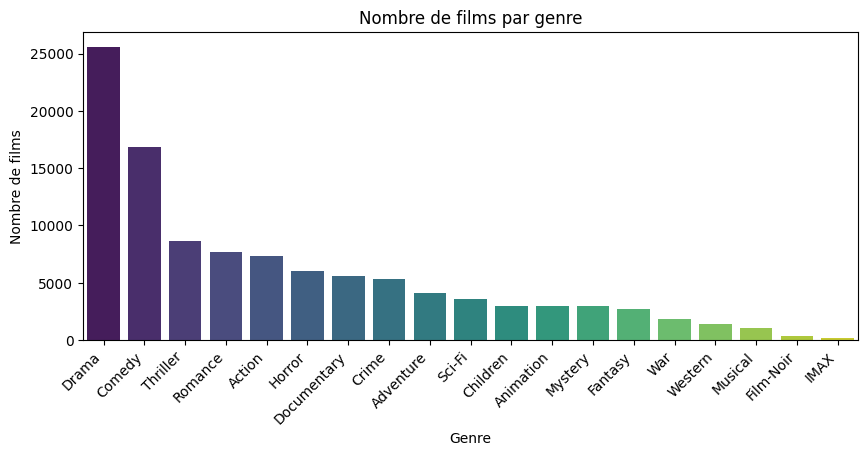

In [8]:
# Utiliser seaborn pour créer un diagramme en bâtons
plt.figure(figsize=(10, 4))
sns.countplot(x='genres', data=df_filtered.explode('genres'), palette='viridis', order=df_filtered['genres'].explode().value_counts().index)
plt.title('Nombre de films par genre')
plt.xlabel('Genre')
plt.ylabel('Nombre de films')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()

# **2- Extraction le nouveau jeu de données movies1.csv et ratings1.csv**

In [9]:
ratings_df = pd.read_csv("/content/drive/MyDrive/TP Sciences des Données/TP3/ratings.csv")
ratings_df

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [10]:
# Nombre de films non listés
missing_movies = set(ratings_df['movieId']) - set(df_filtered['movieId'])
print("Films non listés :", len(missing_movies))

Films non listés : 4568


### **Suppression des fichiers de toutes les lignes dont l’identifiant du film est non listé**

In [11]:
# Mettre à jour ratings_df pour ne contenir que les lignes avec movieId présent dans df_filtered (films listés)
ratings_df_updated = ratings_df[ratings_df['movieId'].isin(df_filtered['movieId'])]

# Afficher le DataFrame des ratings mis à jour
ratings_df_updated

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [12]:
# Vérification s'il reste des films non listés
missing_movies = set(ratings_df_updated['movieId']) - set(df_filtered['movieId'])
print("Films non listés restants :", len(missing_movies))

Films non listés restants : 0


In [13]:
# Les valeurs diférentes dans colonnes ratings de ratings_df_updated
ratings_df_updated['rating'].unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

###**Mapping des valeurs des ratings**

In [14]:
import math
# Arrondir les valeurs comme suit : 5.5 → 5, 4.5 → 4, 3.5 → 3, 2.5 → 2, 1.5 → 1
ratings_df_updated['rating'] = ratings_df_updated['rating'].apply(lambda x: math.floor(x) if x % 1 == 0.5 and x!= 0.5 else x)
# Gérer le cas  0.5 → 1
ratings_df_updated['rating'] = ratings_df_updated['rating'].apply(lambda x: 1 if x == 0.5 else x)

<ipython-input-14-96cf403695dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df_updated['rating'] = ratings_df_updated['rating'].apply(lambda x: math.floor(x) if x % 1 == 0.5 and x!= 0.5 else x)
<ipython-input-14-96cf403695dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings_df_updated['rating'] = ratings_df_updated['rating'].apply(lambda x: 1 if x == 0.5 else x)


In [15]:
# Les valeurs diférentes dans colonnes ratings de ratings_df_updated après mapping des ratings
ratings_df_updated['rating'].unique()

array([5., 3., 4., 2., 1.])

###**Extraction des nouveaux jeu de données movies1.csv et ratings1.csv**

In [16]:
# Enregistrer les nouveaux DataFrames dans des fichiers CSV
ratings_df_updated.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/ratings1.csv', index=False)
df_filtered.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/movies1.csv', index=False)

#**3- Matrice binaire de contenu**




In [17]:
df_filtered['genres']

0        [Adventure, Animation, Children, Comedy, Fantasy]
1                           [Adventure, Children, Fantasy]
2                                        [Comedy, Romance]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
                               ...                        
62417                            [Action, Comedy, Romance]
62418                                              [Drama]
62419                                        [Documentary]
62420                                      [Comedy, Drama]
62422                           [Action, Adventure, Drama]
Name: genres, Length: 57361, dtype: object

In [18]:
from sklearn.preprocessing import MultiLabelBinarizer

# Utilisation de MultiLabelBinarizer pour créer la matrice binaire
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(df_filtered['genres'])

# Créer un nouveau DataFrame avec la matrice binaire en incluant 'movieId'
content_matrix = pd.DataFrame(genre_matrix, columns=mlb.classes_)
content_matrix.insert(0, 'movieId', df_filtered['movieId'])

# Afficher le DataFrame
content_matrix

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57356,196185.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
57357,196187.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
57358,196191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
57359,196195.0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# On enregistre la matrice des contenus pour plus tard
content_matrix.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/content_matrix.csv', index=False)

# **4-Matrice des profils des utilisateurs**

In [20]:
missing_movies = set(content_matrix['movieId']) - set(df_filtered['movieId'])
print("Films manquants dans df_filtered :", len(missing_movies))

Films manquants dans df_filtered : 4548


In [21]:
# On enlève cette colonne inutile pour les calculs
ratings_df_updated = ratings_df_updated.drop(['timestamp'], axis=1)

In [22]:
# Mettre à jour ratings_df_updated pour ne contenir que les lignes avec movieId présent dans content_matrix (films listés)
ratings_df_updated = ratings_df_updated[ratings_df_updated['movieId'].isin(content_matrix['movieId'])]

# Afficher le DataFrame des ratings mis à jour
ratings_df_updated

,userId,movieId,rating
0,1,296,5.0
1,1,306,3.0
2,1,307,5.0
3,1,665,5.0
4,1,899,3.0
...,...,...,...
25000090,162541,50872,4.0
25000091,162541,55768,2.0
25000092,162541,56176,2.0
25000093,162541,58559,4.0


In [23]:
# Choisir un nombre d'utilisateurs restreints
# Nombre d'utilisateurs à sélectionner de manière aléatoire
n_users = 5000

# Sélection aléatoire des utilisateurs
random_users = ratings_df_updated['userId'].unique()
random_users = np.random.choice(random_users, n_users, replace=False)

# Filtrer les lignes pour les utilisateurs sélectionnés de manière aléatoire
random_users = ratings_df_updated[ratings_df_updated['userId'].isin(random_users)]

# Affichage
random_users

,userId,movieId,rating
3864,23,3,5.0
3865,23,6,4.0
3866,23,7,2.0
3867,23,11,5.0
3868,23,14,2.0
...,...,...,...
24997817,162527,84152,3.0
24997818,162527,84392,4.0
24997819,162527,84601,3.0
24997820,162527,84615,4.0


In [24]:
# Utilisation de la fonction pivot pour grouper le dataframe
evaluation_matrix = random_users.pivot(index='userId', columns='movieId', values='rating')

# Les films non évalué ont un rating 0
evaluation_matrix.fillna(0, inplace=True)

# Convertir les ratings en valeurs numériques
evaluation_matrix = evaluation_matrix.apply(pd.to_numeric)

evaluation_matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,196035,196065,196067,196081,196097,196113,196115,196117,196175,196191
userId,,,,,,,,,,,,,,,,,,,,,
23,0.0,0.0,5.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,0.0,0.0,1.0,0.0,3.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162379,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Fonction pour le calcul des profils des users

def calculate_user_profiles(users, content):
    """
    Fonction qui permet de calculer les profils d'un certain nombre utilisateurs
    Paramètres :
      - users = matrice des ratings des utilisateurs
      - content = matrice des contenus
    Retourne : Matrice des profils des utilisateurs
    """
    users_profiles = {}
    # S'assurer que les valeurs sont de type numéri<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<que
    users = users.apply(pd.to_numeric, errors='coerce')

    for user_id, user_ratings in users.groupby('userId'):

        # Liste des films évalués
        rated_films = user_ratings['movieId'].drop_duplicates()

        # Contenu des films évalués
        content_rated_films = content[content['movieId'].isin(rated_films)]

        # Suppression des colonnes non utiles pour le calcul du profil
        user_ratings = user_ratings.drop(['userId', 'movieId'], axis=1)
        content_rated_films = content_rated_films.drop(['movieId'], axis=1)

        # Calcul du profil : Faire le produit de la matrice binaire et la matrice de ratings
        user_profile = np.dot(user_ratings['rating'].T, content_rated_films.values)

        # Enregistrer le profil
        users_profiles[user_id] = user_profile<<<<<<<<

    return users_profiles

In [26]:
# Calcul des profils des utilisateurs -- stockés dans la matrice users_profiles
users_profiles = {}
users_profiles = calculate_user_profiles(random_users, content_matrix)

# Convertir le dictionnaire users_profiles en DataFrame
users_profiles_df = pd.DataFrame.from_dict(users_profiles, orient='index')

# Réorganiser les colonnes pour avoir userId en première position
users_profiles_df.insert(0, 'userId', users_profiles_df.index)

# Renommer les colonnes
users_profiles_df.columns = ['userId'] + all_genres_list

# Afficher la matrice des profils
users_profiles_df

,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
23,23,256.0,176.0,13.0,31.0,618.0,240.0,27.0,935.0,88.0,15.0,20.0,5.0,38.0,103.0,354.0,119.0,252.0,69.0,21.0
24,24,43.0,16.0,13.0,13.0,35.0,37.0,0.0,35.0,8.0,0.0,10.0,4.0,5.0,4.0,9.0,6.0,41.0,4.0,4.0
48,48,47.0,38.0,0.0,3.0,46.0,26.0,0.0,30.0,3.0,0.0,0.0,0.0,3.0,8.0,12.0,5.0,51.0,5.0,0.0
54,54,42.0,31.0,0.0,0.0,24.0,19.0,0.0,39.0,0.0,0.0,10.0,0.0,0.0,7.0,16.0,18.0,21.0,2.0,0.0
64,64,75.0,79.0,43.0,44.0,50.0,42.0,0.0,95.0,41.0,0.0,12.0,20.0,8.0,19.0,27.0,43.0,49.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162379,162379,310.0,274.0,85.0,142.0,356.0,241.0,7.0,687.0,152.0,0.0,68.0,51.0,46.0,125.0,283.0,141.0,347.0,83.0,6.0
162423,162423,3.0,30.0,12.0,16.0,28.0,4.0,3.0,35.0,26.0,0.0,0.0,19.0,24.0,4.0,34.0,0.0,4.0,5.0,0.0
162438,162438,41.0,20.0,0.0,4.0,12.0,26.0,0.0,33.0,0.0,0.0,5.0,0.0,0.0,4.0,12.0,11.0,54.0,9.0,4.0
162488,162488,426.0,267.0,31.0,10.0,207.0,157.0,0.0,241.0,85.0,19.0,72.0,23.0,7.0,78.0,69.0,383.0,306.0,34.0,15.0


In [27]:
# Supprimer les lignes dupliquées
users_profiles_df = users_profiles_df.drop_duplicates()

# Afficher les données après la suppression des lignes dupliquées
print("Données après suppression des lignes dupliquées :")
users_profiles_df

Données après suppression des lignes dupliquées :


,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
23,23,256.0,176.0,13.0,31.0,618.0,240.0,27.0,935.0,88.0,15.0,20.0,5.0,38.0,103.0,354.0,119.0,252.0,69.0,21.0
24,24,43.0,16.0,13.0,13.0,35.0,37.0,0.0,35.0,8.0,0.0,10.0,4.0,5.0,4.0,9.0,6.0,41.0,4.0,4.0
48,48,47.0,38.0,0.0,3.0,46.0,26.0,0.0,30.0,3.0,0.0,0.0,0.0,3.0,8.0,12.0,5.0,51.0,5.0,0.0
54,54,42.0,31.0,0.0,0.0,24.0,19.0,0.0,39.0,0.0,0.0,10.0,0.0,0.0,7.0,16.0,18.0,21.0,2.0,0.0
64,64,75.0,79.0,43.0,44.0,50.0,42.0,0.0,95.0,41.0,0.0,12.0,20.0,8.0,19.0,27.0,43.0,49.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162379,162379,310.0,274.0,85.0,142.0,356.0,241.0,7.0,687.0,152.0,0.0,68.0,51.0,46.0,125.0,283.0,141.0,347.0,83.0,6.0
162423,162423,3.0,30.0,12.0,16.0,28.0,4.0,3.0,35.0,26.0,0.0,0.0,19.0,24.0,4.0,34.0,0.0,4.0,5.0,0.0
162438,162438,41.0,20.0,0.0,4.0,12.0,26.0,0.0,33.0,0.0,0.0,5.0,0.0,0.0,4.0,12.0,11.0,54.0,9.0,4.0
162488,162488,426.0,267.0,31.0,10.0,207.0,157.0,0.0,241.0,85.0,19.0,72.0,23.0,7.0,78.0,69.0,383.0,306.0,34.0,15.0


#**5-Clusering spectral**

In [28]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler

In [29]:
# Suppression de 'userId' de la liste des colonnes
features = users_profiles_df.columns[1:]
X = users_profiles_df[features]
# Mise à l'échelle des données
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Créer un DataFrame à partir des données mises à l'échelle
scaled_df = pd.DataFrame(X_scaled, columns=users_profiles_df.columns[1:])

# Afficher le DataFrame
scaled_df

,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
0,1.480315,1.142857,0.000000,0.325,3.562914,2.474359,3.000000,3.980583,1.192308,3.0,0.233333,-0.111111,1.578947,2.075,3.756098,1.135135,1.591398,2.000000,1.545455
1,-0.196850,-0.380952,0.000000,-0.125,-0.298013,-0.128205,0.000000,-0.388350,-0.346154,0.0,-0.100000,-0.166667,-0.157895,-0.400,-0.451220,-0.391892,-0.223656,-0.407407,0.000000
2,-0.165354,-0.171429,-0.393939,-0.375,-0.225166,-0.269231,0.000000,-0.412621,-0.442308,0.0,-0.433333,-0.388889,-0.263158,-0.300,-0.414634,-0.405405,-0.137634,-0.370370,-0.363636
3,-0.204724,-0.238095,-0.393939,-0.450,-0.370861,-0.358974,0.000000,-0.368932,-0.500000,0.0,-0.100000,-0.388889,-0.421053,-0.325,-0.365854,-0.229730,-0.395699,-0.481481,-0.363636
4,0.055118,0.219048,0.909091,0.650,-0.198675,-0.064103,0.000000,-0.097087,0.288462,0.0,-0.033333,0.722222,0.000000,-0.025,-0.231707,0.108108,-0.154839,-0.074074,-0.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.905512,2.076190,2.181818,3.100,1.827815,2.487179,0.777778,2.776699,2.423077,0.0,1.833333,2.444444,2.000000,2.625,2.890244,1.432432,2.408602,2.518519,0.181818
4996,-0.511811,-0.247619,-0.030303,-0.050,-0.344371,-0.551282,0.333333,-0.388350,0.000000,0.0,-0.433333,0.666667,0.842105,-0.400,-0.146341,-0.472973,-0.541935,-0.370370,-0.363636
4997,-0.212598,-0.342857,-0.393939,-0.350,-0.450331,-0.269231,0.000000,-0.398058,-0.500000,0.0,-0.266667,-0.388889,-0.421053,-0.400,-0.414634,-0.324324,-0.111828,-0.222222,0.000000
4998,2.818898,2.009524,0.545455,-0.200,0.841060,1.410256,0.000000,0.611650,1.134615,3.8,1.966667,0.888889,-0.052632,1.450,0.280488,4.702703,2.055914,0.703704,1.000000


Label 0: 3652 points
Label 1: 1348 points


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Label 0: 2206 points
Label 1: 2337 points
Label 2: 457 points


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Label 0: 2020 points
Label 1: 2082 points
Label 2: 370 points
Label 3: 528 points


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Label 0: 417 points
Label 1: 1509 points
Label 2: 1955 points
Label 3: 933 points
Label 4: 186 points


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


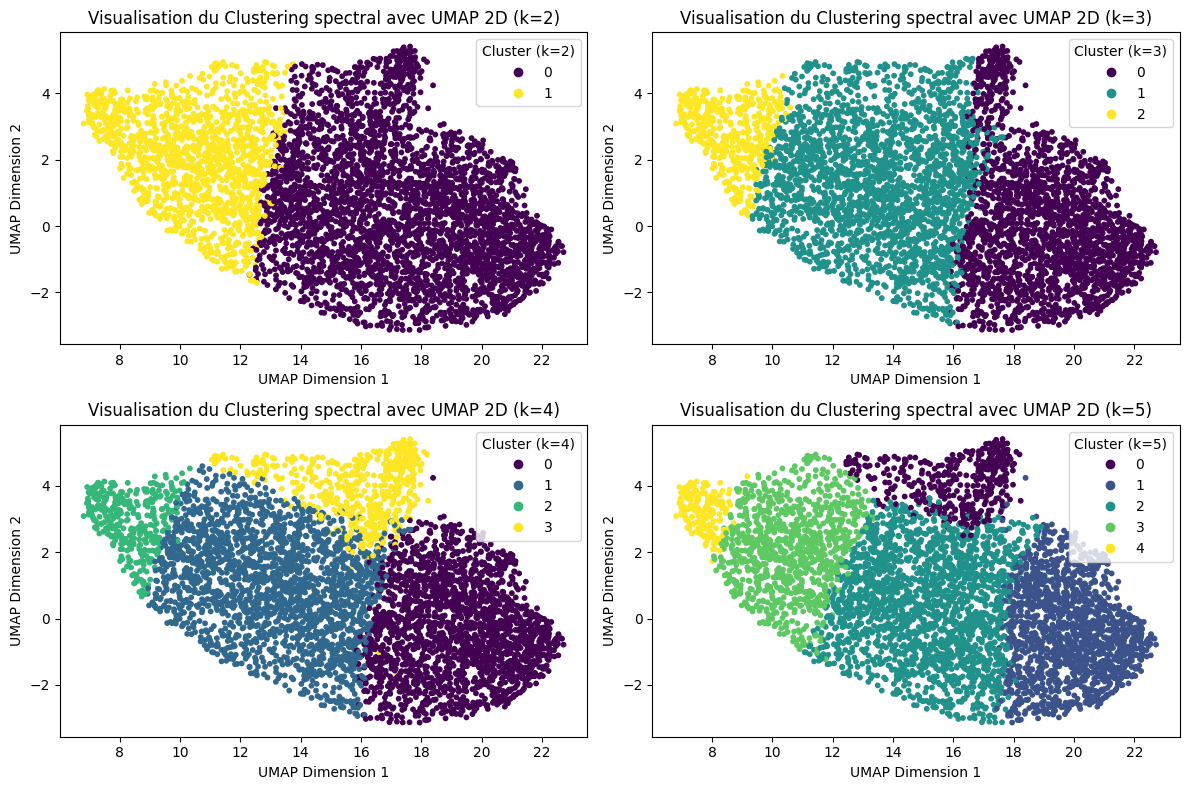

In [31]:
import umap
import matplotlib.pyplot as plt

# Les différentes valeurs de k à essayer
k_values = [2, 3, 4, 5]

# Initialisation de quelques variables
best_silhouette_score = float('-inf')
best_k = None
silhouette_scores = []

# Pour la visualisation des clusters avec UMAP
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    # Regroupement spectral sur les utilisateurs
    spectral = SpectralClustering(n_clusters=k,affinity='nearest_neighbors', n_neighbors=20, random_state=42)
    labels = spectral.fit_predict(X_scaled)  # Utiliser les données mises à l'échelle


    # Afficher le nombre de points par label
    label_counts = np.bincount(labels)
    for label, count in enumerate(label_counts):
      print(f"Label {label}: {count} points")

    # Score de silhouette
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

    # Mise à jour du meilleur score
    if score > best_silhouette_score:
        best_silhouette_score = score
        best_k = k

    # Ajoutez les étiquettes au DataFrame d'utilisateurs
    #users_profiles_df[f'cluster_label_k{k}'] = labels

    # Utilisez UMAP pour la visualisation des clusters
    umap_embedding = umap.UMAP(n_neighbors=100, min_dist=0.5, n_components=2, random_state=42).fit_transform(X_scaled)

    # Visualisez les clusters avec UMAP
    plt.subplot(2, 2, i)
    scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=labels, cmap='viridis', s=10)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.title(f'Visualisation du Clustering spectral avec UMAP 2D (k={k})')

    # Ajouter la légende pour chaque cluster
    plt.legend(*scatter.legend_elements(), title=f'Cluster (k={k})', loc='upper right')

plt.tight_layout()
plt.show()


In [32]:
# Affichez le meilleur score de silhouette et le k associé
print(f"Meilleur score de silhouette: {best_silhouette_score} obtenu avec k={best_k}")


Meilleur score de silhouette: 0.5391182478924237 obtenu avec k=2


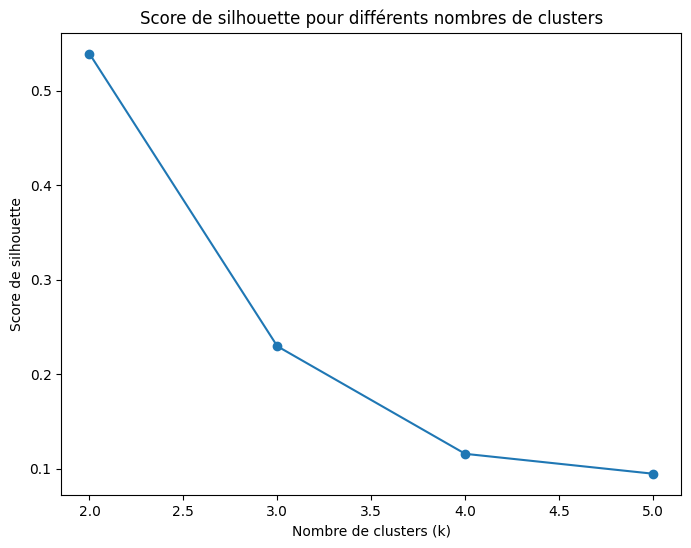

In [33]:
# Visualisez la courbe des scores silhouette
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()

In [34]:
best_spectral = SpectralClustering(n_clusters=best_k, affinity='nearest_neighbors', n_neighbors=20, random_state=42)
best_labels = best_spectral.fit_predict(X)

# Ajoutez les étiquettes au DataFrame d'utilisateurs
users_profiles_df['cluster'] = best_labels

In [35]:
users_profiles_df

,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,...,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir,cluster
23,23,256.0,176.0,13.0,31.0,618.0,240.0,27.0,935.0,88.0,...,20.0,5.0,38.0,103.0,354.0,119.0,252.0,69.0,21.0,0
24,24,43.0,16.0,13.0,13.0,35.0,37.0,0.0,35.0,8.0,...,10.0,4.0,5.0,4.0,9.0,6.0,41.0,4.0,4.0,1
48,48,47.0,38.0,0.0,3.0,46.0,26.0,0.0,30.0,3.0,...,0.0,0.0,3.0,8.0,12.0,5.0,51.0,5.0,0.0,1
54,54,42.0,31.0,0.0,0.0,24.0,19.0,0.0,39.0,0.0,...,10.0,0.0,0.0,7.0,16.0,18.0,21.0,2.0,0.0,1
64,64,75.0,79.0,43.0,44.0,50.0,42.0,0.0,95.0,41.0,...,12.0,20.0,8.0,19.0,27.0,43.0,49.0,13.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162379,162379,310.0,274.0,85.0,142.0,356.0,241.0,7.0,687.0,152.0,...,68.0,51.0,46.0,125.0,283.0,141.0,347.0,83.0,6.0,0
162423,162423,3.0,30.0,12.0,16.0,28.0,4.0,3.0,35.0,26.0,...,0.0,19.0,24.0,4.0,34.0,0.0,4.0,5.0,0.0,1
162438,162438,41.0,20.0,0.0,4.0,12.0,26.0,0.0,33.0,0.0,...,5.0,0.0,0.0,4.0,12.0,11.0,54.0,9.0,4.0,1
162488,162488,426.0,267.0,31.0,10.0,207.0,157.0,0.0,241.0,85.0,...,72.0,23.0,7.0,78.0,69.0,383.0,306.0,34.0,15.0,0


On libère de la mémoire Ram pour le reste des calculs

In [36]:
# Libérer la mémoire manuellement
import gc
del df, df_filtered, ratings_df_updated, ratings_df, content_matrix, users_profiles_df, scaled_df, X_scaled
gc.collect()

61584

#**6-Prédiction des votes**

###**Préparation des données**

In [37]:
from sklearn.model_selection import train_test_split

# Charger le fichier ratings1.csv
ratings = pd.read_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/ratings1.csv')

# Charger la matrice de contenu
content_matrix = pd.read_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/content_matrix.csv')

# Considérer 'userId' et 'movieId' comme des variables catégoriques
ratings['userId'] = ratings['userId'].astype('category')
ratings['movieId'] = ratings['movieId'].astype('category')


# Division des données train, evaluation et test de manière stratifiée
# Entraînement (60%), d'évaluation (20%) et de test (20%)

# Diviser les données en train, validation et test
train_users, temp_users = train_test_split(ratings['userId'].unique(), test_size=0.4, random_state=42)
eval_users, test_users = train_test_split(temp_users, test_size=0.5, random_state=42)

# Séparer les données en fonction des utilisateurs
ratings_train = ratings[ratings['userId'].isin(train_users)]
ratings_eval = ratings[ratings['userId'].isin(eval_users)]
ratings_test = ratings[ratings['userId'].isin(test_users)]

# Vérifier la proportion des votes dans chaque ensemble
print("Proportion des votes dans l'ensemble d'entraînement:")
print(ratings_train['rating'].value_counts(normalize=True))

print("\nProportion des votes dans l'ensemble de validation:")
print(ratings_eval['rating'].value_counts(normalize=True))

print("\nProportion des votes dans l'ensemble de test:")
print(ratings_test['rating'].value_counts(normalize=True))

Proportion des votes dans l'ensemble d'entraînement:
4.0    0.354268
3.0    0.322973
5.0    0.143682
2.0    0.115856
1.0    0.063221
Name: rating, dtype: float64

Proportion des votes dans l'ensemble de validation:
4.0    0.355232
3.0    0.321076
5.0    0.147410
2.0    0.114507
1.0    0.061775
Name: rating, dtype: float64

Proportion des votes dans l'ensemble de test:
4.0    0.350447
3.0    0.324641
5.0    0.144256
2.0    0.118467
1.0    0.062189
Name: rating, dtype: float64


In [38]:
# Enregistrez les fichiers CSV
ratings_train.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/ratings_train.csv', index=False)
ratings_eval.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/ratings_evaluation.csv', index=False)
ratings_test.to_csv('/content/drive/MyDrive/TP Sciences des Données/TP3/ratings_test.csv', index=False)

## **Construction du modèle de classification**

### **Selection d'un sous ensemble d'entrainement, de validation et de test**

In [39]:
# Choisir un nombre d'utilisateurs restreints
# Nombre d'utilisateurs à sélectionner de manière aléatoire
n_users = 5000

# Sélection aléatoire des utilisateurs
ratings_subset = ratings['userId'].unique()
ratings_subset = np.random.choice(ratings_subset, n_users, replace=False)

# Filtrer les lignes pour les utilisateurs sélectionnés de manière aléatoire
ratings_subset = ratings[ratings['userId'].isin(ratings_subset)]

In [40]:
# On enlève cette colonne inutile pour les calculs
ratings_subset = ratings_subset.drop(['timestamp'], axis=1)

In [41]:
# Mettre à jour ratings_subset pour ne contenir que les lignes avec movieId présent dans content_matrix (films listés)
ratings_subset = ratings_subset[ratings_subset['movieId'].isin(content_matrix['movieId'])]

# Afficher le DataFrame des ratings mis à jour
ratings_subset

,userId,movieId,rating
1151,5,1,4.0
1152,5,19,4.0
1153,5,32,5.0
1154,5,36,5.0
1155,5,39,2.0
...,...,...,...
24956661,162476,8974,3.0
24956662,162476,8998,4.0
24956663,162476,9004,2.0
24956664,162476,9005,2.0


In [42]:
# Diviser les données en train, validation et test
train_users, temp_users = train_test_split(ratings_subset['userId'].unique(), test_size=0.4, random_state=42)
eval_users, test_users = train_test_split(temp_users, test_size=0.5, random_state=42)

# Séparer les données en fonction des utilisateurs
ratings_train_subset = ratings_subset[ratings_subset['userId'].isin(train_users)]
ratings_eval_subset = ratings_subset[ratings_subset['userId'].isin(eval_users)]
ratings_test_subset = ratings_subset[ratings_subset['userId'].isin(test_users)]

# Vérifier la proportion des votes dans chaque ensemble
print("Proportion des votes dans l'ensemble d'entraînement:")
print(ratings_train_subset['rating'].value_counts(normalize=True))

print("\nProportion des votes dans l'ensemble de validation:")
print(ratings_eval_subset['rating'].value_counts(normalize=True))

print("\nProportion des votes dans l'ensemble de test:")
print(ratings_test_subset['rating'].value_counts(normalize=True))


Proportion des votes dans l'ensemble d'entraînement:
4.0    0.361175
3.0    0.323706
5.0    0.141988
2.0    0.113919
1.0    0.059212
Name: rating, dtype: float64

Proportion des votes dans l'ensemble de validation:
4.0    0.353129
3.0    0.318447
5.0    0.153346
2.0    0.113140
1.0    0.061938
Name: rating, dtype: float64

Proportion des votes dans l'ensemble de test:
4.0    0.356593
3.0    0.319603
5.0    0.149847
2.0    0.114920
1.0    0.059036
Name: rating, dtype: float64


### **Calcul des profils pour chacun des ensembles**

#### Pour l'ensembre l'entrainement

In [43]:
# Calcul des profils des utilisateurs
users_profiles_train = {}
users_profiles_train = calculate_user_profiles(ratings_train_subset, content_matrix)
# Convertir le dictionnaire users_profiles en DataFrame
users_profiles_train = pd.DataFrame.from_dict(users_profiles_train, orient='index')
# Réorganiser les colonnes pour avoir userId en première position
users_profiles_train.insert(0, 'userId', users_profiles_train.index)
# Renommer les colonnes
users_profiles_train.columns = ['userId'] + all_genres_list
# Afficher la matrice des profils
users_profiles_train

,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
132,132,178.0,137.0,27.0,23.0,296.0,124.0,0.0,563.0,49.0,4.0,25.0,4.0,6.0,67.0,190.0,49.0,156.0,161.0,40.0
136,136,67.0,31.0,6.0,14.0,74.0,33.0,0.0,94.0,12.0,0.0,10.0,10.0,6.0,17.0,61.0,30.0,82.0,22.0,4.0
137,137,49.0,21.0,0.0,0.0,51.0,78.0,0.0,137.0,9.0,7.0,8.0,0.0,0.0,52.0,63.0,9.0,97.0,14.0,1.0
138,138,34.0,28.0,4.0,16.0,66.0,14.0,0.0,55.0,11.0,0.0,16.0,5.0,16.0,0.0,56.0,23.0,37.0,12.0,4.0
180,180,22.0,0.0,0.0,0.0,31.0,31.0,8.0,59.0,0.0,0.0,10.0,9.0,0.0,4.0,7.0,12.0,24.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162225,162225,107.0,85.0,23.0,50.0,98.0,50.0,0.0,160.0,53.0,5.0,163.0,10.0,61.0,61.0,74.0,94.0,182.0,24.0,0.0
162260,162260,77.0,73.0,10.0,19.0,91.0,32.0,0.0,93.0,16.0,0.0,6.0,8.0,7.0,15.0,61.0,40.0,91.0,11.0,14.0
162300,162300,33.0,70.0,78.0,57.0,51.0,12.0,16.0,74.0,48.0,0.0,8.0,23.0,0.0,16.0,30.0,43.0,29.0,8.0,0.0
162329,162329,52.0,27.0,19.0,21.0,26.0,27.0,0.0,50.0,15.0,0.0,4.0,24.0,5.0,11.0,10.0,25.0,36.0,4.0,5.0


#### Pour l'ensemble de validation

In [44]:
# Calcul des profils des utilisateurs
users_profiles_eval = {}
users_profiles_eval = calculate_user_profiles(ratings_eval_subset, content_matrix)
# Convertir le dictionnaire users_profiles en DataFrame
users_profiles_eval = pd.DataFrame.from_dict(users_profiles_eval, orient='index')
# Réorganiser les colonnes pour avoir userId en première position
users_profiles_eval.insert(0, 'userId', users_profiles_eval.index)
# Renommer les colonnes
users_profiles_eval.columns = ['userId'] + all_genres_list
# Afficher la matrice des profils
users_profiles_eval

,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
5,5,67.0,81.0,15.0,30.0,175.0,58.0,0.0,172.0,28.0,0.0,14.0,12.0,26.0,33.0,71.0,45.0,96.0,9.0,15.0
374,374,92.0,79.0,65.0,80.0,120.0,43.0,0.0,101.0,62.0,0.0,4.0,10.0,59.0,17.0,90.0,24.0,91.0,9.0,11.0
455,455,106.0,60.0,0.0,4.0,136.0,62.0,4.0,138.0,18.0,0.0,3.0,4.0,0.0,22.0,77.0,36.0,135.0,24.0,19.0
572,572,804.0,553.0,91.0,126.0,838.0,451.0,19.0,870.0,178.0,31.0,159.0,6.0,75.0,127.0,271.0,409.0,602.0,168.0,124.0
832,832,88.0,44.0,20.0,18.0,200.0,167.0,30.0,638.0,30.0,22.0,19.0,5.0,9.0,73.0,195.0,27.0,175.0,61.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161186,161186,68.0,29.0,6.0,7.0,58.0,22.0,0.0,54.0,11.0,0.0,12.0,2.0,9.0,14.0,12.0,28.0,37.0,12.0,3.0
162254,162254,82.0,100.0,35.0,61.0,143.0,50.0,3.0,165.0,69.0,11.0,18.0,9.0,49.0,35.0,119.0,70.0,85.0,20.0,7.0
162308,162308,9.0,24.0,16.0,31.0,56.0,3.0,0.0,42.0,27.0,0.0,0.0,6.0,16.0,0.0,20.0,6.0,0.0,7.0,9.0
162349,162349,910.0,678.0,187.0,189.0,763.0,537.0,137.0,1267.0,277.0,22.0,229.0,167.0,78.0,245.0,347.0,513.0,936.0,144.0,48.0


#### Pour l'ensemble de test

In [45]:
# Calcul des profils des utilisateurs
users_profiles_test = {}
users_profiles_test = calculate_user_profiles(ratings_test_subset, content_matrix)
# Convertir le dictionnaire users_profiles en DataFrame
users_profiles_test = pd.DataFrame.from_dict(users_profiles_test, orient='index')
# Réorganiser les colonnes pour avoir userId en première position
users_profiles_test.insert(0, 'userId', users_profiles_test.index)
# Renommer les colonnes
users_profiles_test.columns = ['userId'] + all_genres_list
# Afficher la matrice des profils
users_profiles_test

,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,Children,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir
182,182,20.0,24.0,4.0,4.0,27.0,4.0,0.0,19.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,18.0,6.0,0.0,12.0
206,206,86.0,71.0,19.0,28.0,125.0,65.0,5.0,231.0,26.0,0.0,11.0,6.0,26.0,27.0,89.0,47.0,110.0,45.0,10.0
328,328,122.0,70.0,0.0,3.0,67.0,45.0,0.0,104.0,11.0,0.0,11.0,5.0,0.0,16.0,47.0,50.0,111.0,27.0,16.0
419,419,66.0,93.0,41.0,34.0,29.0,18.0,5.0,91.0,83.0,0.0,6.0,16.0,1.0,3.0,27.0,19.0,29.0,10.0,0.0
676,676,289.0,223.0,31.0,80.0,276.0,160.0,0.0,492.0,83.0,3.0,43.0,9.0,60.0,48.0,209.0,121.0,233.0,90.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161806,161806,10.0,8.0,0.0,0.0,96.0,22.0,4.0,29.0,8.0,0.0,0.0,0.0,3.0,13.0,49.0,4.0,13.0,5.0,0.0
161911,161911,80.0,61.0,5.0,12.0,68.0,28.0,0.0,39.0,17.0,0.0,3.0,4.0,5.0,7.0,28.0,34.0,58.0,4.0,7.0
162162,162162,103.0,64.0,29.0,29.0,139.0,103.0,1.0,226.0,21.0,0.0,13.0,9.0,6.0,36.0,63.0,38.0,137.0,49.0,12.0
162353,162353,29.0,47.0,12.0,19.0,31.0,7.0,0.0,61.0,31.0,0.0,5.0,0.0,5.0,5.0,25.0,7.0,7.0,12.0,3.0


### **Clustering spectral**

In [46]:
# Fonction pour le clusering spectral
def spectral_clustering(profiles_matrix, k_cluster):
  """
  Fonction pour faire le clustering spectral
  Paramètres :
    - profiles_matrix : matrices des profiles des utilisateurs
    - le nombre de cluster spécifié pour le clustering spectral
  Retourne profiles_matrix avec une colonne spécifiant
  """
  # Suppression de 'userId' de la liste des colonnes
  features = profiles_matrix.columns[1:]
  X = profiles_matrix[features]
  # Mise à l'échelle des données
  scaler = RobustScaler()
  X_scaled = scaler.fit_transform(X)

  # Clustering spectral
  spectral = SpectralClustering(n_clusters=k_cluster, affinity='nearest_neighbors', n_neighbors=20, random_state=42)
  labels = spectral.fit_predict(X)

  # Score de silhouette
  score = silhouette_score(X_scaled, labels)
  print(f"Silhouette Score: {score}")

  # Ajoutez les étiquettes au DataFrame d'utilisateurs
  profiles_matrix['cluster'] = labels
  return profiles_matrix

#### Pour l'ensemble d'entrainement

In [47]:
# Clustering spectral
users_profiles_train = spectral_clustering(users_profiles_train, k_cluster=2)

# Affichage
users_profiles_train

Silhouette Score: 0.517069319308068


,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,...,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir,cluster
132,132,178.0,137.0,27.0,23.0,296.0,124.0,0.0,563.0,49.0,...,25.0,4.0,6.0,67.0,190.0,49.0,156.0,161.0,40.0,1
136,136,67.0,31.0,6.0,14.0,74.0,33.0,0.0,94.0,12.0,...,10.0,10.0,6.0,17.0,61.0,30.0,82.0,22.0,4.0,0
137,137,49.0,21.0,0.0,0.0,51.0,78.0,0.0,137.0,9.0,...,8.0,0.0,0.0,52.0,63.0,9.0,97.0,14.0,1.0,0
138,138,34.0,28.0,4.0,16.0,66.0,14.0,0.0,55.0,11.0,...,16.0,5.0,16.0,0.0,56.0,23.0,37.0,12.0,4.0,0
180,180,22.0,0.0,0.0,0.0,31.0,31.0,8.0,59.0,0.0,...,10.0,9.0,0.0,4.0,7.0,12.0,24.0,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162225,162225,107.0,85.0,23.0,50.0,98.0,50.0,0.0,160.0,53.0,...,163.0,10.0,61.0,61.0,74.0,94.0,182.0,24.0,0.0,0
162260,162260,77.0,73.0,10.0,19.0,91.0,32.0,0.0,93.0,16.0,...,6.0,8.0,7.0,15.0,61.0,40.0,91.0,11.0,14.0,0
162300,162300,33.0,70.0,78.0,57.0,51.0,12.0,16.0,74.0,48.0,...,8.0,23.0,0.0,16.0,30.0,43.0,29.0,8.0,0.0,0
162329,162329,52.0,27.0,19.0,21.0,26.0,27.0,0.0,50.0,15.0,...,4.0,24.0,5.0,11.0,10.0,25.0,36.0,4.0,5.0,0


#### Pour l'ensemble de validation

In [48]:
# Clustering spectral
users_profiles_eval = spectral_clustering(users_profiles_eval, k_cluster=2)

# Affichage
users_profiles_train

Silhouette Score: 0.5407442157617723


,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,...,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir,cluster
132,132,178.0,137.0,27.0,23.0,296.0,124.0,0.0,563.0,49.0,...,25.0,4.0,6.0,67.0,190.0,49.0,156.0,161.0,40.0,1
136,136,67.0,31.0,6.0,14.0,74.0,33.0,0.0,94.0,12.0,...,10.0,10.0,6.0,17.0,61.0,30.0,82.0,22.0,4.0,0
137,137,49.0,21.0,0.0,0.0,51.0,78.0,0.0,137.0,9.0,...,8.0,0.0,0.0,52.0,63.0,9.0,97.0,14.0,1.0,0
138,138,34.0,28.0,4.0,16.0,66.0,14.0,0.0,55.0,11.0,...,16.0,5.0,16.0,0.0,56.0,23.0,37.0,12.0,4.0,0
180,180,22.0,0.0,0.0,0.0,31.0,31.0,8.0,59.0,0.0,...,10.0,9.0,0.0,4.0,7.0,12.0,24.0,0.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162225,162225,107.0,85.0,23.0,50.0,98.0,50.0,0.0,160.0,53.0,...,163.0,10.0,61.0,61.0,74.0,94.0,182.0,24.0,0.0,0
162260,162260,77.0,73.0,10.0,19.0,91.0,32.0,0.0,93.0,16.0,...,6.0,8.0,7.0,15.0,61.0,40.0,91.0,11.0,14.0,0
162300,162300,33.0,70.0,78.0,57.0,51.0,12.0,16.0,74.0,48.0,...,8.0,23.0,0.0,16.0,30.0,43.0,29.0,8.0,0.0,0
162329,162329,52.0,27.0,19.0,21.0,26.0,27.0,0.0,50.0,15.0,...,4.0,24.0,5.0,11.0,10.0,25.0,36.0,4.0,5.0,0


#### Pour l'ensemble de test

In [49]:
# Clustering spectral
users_profiles_test = spectral_clustering(users_profiles_test, k_cluster=2)

# Affichage
users_profiles_test

Silhouette Score: 0.44781147852737363


,userId,Sci-Fi,Crime,IMAX,Action,Western,Drama,Musical,Horror,Romance,...,Mystery,Adventure,Documentary,Animation,Fantasy,Comedy,Thriller,War,Film-Noir,cluster
182,182,20.0,24.0,4.0,4.0,27.0,4.0,0.0,19.0,4.0,...,0.0,0.0,0.0,0.0,11.0,18.0,6.0,0.0,12.0,1
206,206,86.0,71.0,19.0,28.0,125.0,65.0,5.0,231.0,26.0,...,11.0,6.0,26.0,27.0,89.0,47.0,110.0,45.0,10.0,1
328,328,122.0,70.0,0.0,3.0,67.0,45.0,0.0,104.0,11.0,...,11.0,5.0,0.0,16.0,47.0,50.0,111.0,27.0,16.0,1
419,419,66.0,93.0,41.0,34.0,29.0,18.0,5.0,91.0,83.0,...,6.0,16.0,1.0,3.0,27.0,19.0,29.0,10.0,0.0,1
676,676,289.0,223.0,31.0,80.0,276.0,160.0,0.0,492.0,83.0,...,43.0,9.0,60.0,48.0,209.0,121.0,233.0,90.0,56.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161806,161806,10.0,8.0,0.0,0.0,96.0,22.0,4.0,29.0,8.0,...,0.0,0.0,3.0,13.0,49.0,4.0,13.0,5.0,0.0,1
161911,161911,80.0,61.0,5.0,12.0,68.0,28.0,0.0,39.0,17.0,...,3.0,4.0,5.0,7.0,28.0,34.0,58.0,4.0,7.0,1
162162,162162,103.0,64.0,29.0,29.0,139.0,103.0,1.0,226.0,21.0,...,13.0,9.0,6.0,36.0,63.0,38.0,137.0,49.0,12.0,1
162353,162353,29.0,47.0,12.0,19.0,31.0,7.0,0.0,61.0,31.0,...,5.0,0.0,5.0,5.0,25.0,7.0,7.0,12.0,3.0,1


### **Calcul des 5 uilisateurs les plus proches**

D'abord on prend pour chaque utilisateur U la liste des autres utilisateurs "candidats", c'est-à-dire ceux qui ont voté le même film que l'utilisateur U.  

In [50]:
def create_user_movie_dict(ratings_):
    """
    Fonction qui prend un DataFrame de ratings "rating_" en entrée et retourne un dictionnaire
    où chaque utilisateur est associé à un autre dictionnaire contenant les films qu'il
    a notés et les utilisateurs qui ont également noté ces films.
    """
    user_movie_dict = {}
    processed_movies = set()

    # Grouper les données par utilisateur
    grouped_by_user = ratings_.groupby('userId')

    # Grouper les données par film
    grouped_by_movie = ratings_.groupby('movieId')

    # Parcourir chaque utilisateur
    for user_id, user_data in grouped_by_user:
        user_movie_dict[user_id] = {}

        # Parcourir les films notés par cet utilisateur
        for _, movie_row in user_data.iterrows():
            movie_id = int(movie_row['movieId'])

            # Vérifier si le film a déjà été pris en compte
            if movie_id in processed_movies:
                continue

            # Trouver les autres utilisateurs qui ont noté le même film
            other_users = list(grouped_by_movie.get_group(movie_id)['userId'])

            # Ignorer le film si le nombre d'utilisateurs est inférieur à 6 (5+ l'utilisateur lui-même)
            if len(other_users) < 6:
                continue

            # Ajouter cette information au dictionnaire
            user_movie_dict[user_id][movie_id] = other_users

            # Ajouter le film à l'ensemble des films déjà traités
            processed_movies.add(movie_id)

    return user_movie_dict

In [51]:
# Création des dictionnaires pour chaque ensemble

# S'assurer que les valeurs sont de type numérique
ratings_train_subset = ratings_train_subset.apply(pd.to_numeric, errors='coerce')
ratings_eval_subset = ratings_eval_subset.apply(pd.to_numeric, errors='coerce')
ratings_test_subset = ratings_test_subset.apply(pd.to_numeric, errors='coerce')

# Ensemble d'entrainement
user_movie_train_subset = create_user_movie_dict(ratings_train_subset)

In [52]:
# Ensemble d'évaluation
user_movie_eval_subset = create_user_movie_dict(ratings_eval_subset)


In [53]:
# Ensemble de test
user_movie_test_subset = create_user_movie_dict(ratings_test_subset)

Ensuite on peut écrire la fonction qui calcul pour chaque utilisateur Uu et pour un film donnée Ii, ces 5 plus proches voisins en terme de profils. On doit tenir compte du cluster de l'ustilisateur Uu pour choisir ses voisins qui ont voté pour le films Uu.

In [54]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

def get_top_neighbors(user_id, movie_id, user_movie_dict, ratings_matrix, profiles_matrix, k=5):
    """
    Fonction qui calcule les k voisins les plus proches d'un utilisateur pour un film donné,
    en tenant compte du cluster de l'utilisateur.
    Il retourne [V1, V2, V3, V4, V5, V] avec V1 à V5 la liste des 5 votes des plus proches voisin et V
    le vote de l'utilisateur cible.
    """
    #print("userId = ", user_id)
    # Récupérer le cluster de l'utilisateur
    user_cluster = profiles_matrix.loc[user_id, 'cluster']
    #print("user_cluster:", user_cluster)

    # Récupérer les utilisateurs du même cluster
    cluster_users = [user for user, data in user_movie_dict.items() if profiles_matrix.loc[user, 'cluster'] == user_cluster]
    #print("cluster_users:", cluster_users)

    # Récupérer les votes pour le film donné par les utilisateurs du même cluster
    movie_ratings = ratings_matrix.loc[ratings_matrix['movieId'] == movie_id, ['userId', 'rating']]
    #print('movie ratings', movie_ratings)

    # Récupérer les id des voisins candidats
    neighbors_id = movie_ratings['userId'].tolist()
    #print('neighbors id : ', neighbors_id)


    # Créer une liste des colonnes à utiliser pour le calcul de la distance
    columns_to_use = profiles_matrix.columns[1:-1]  # Exclure la colonne 'userId' et 'cluster'

    # Sélectionner les profils des utilisateurs voisins
    neighbors_profiles = profiles_matrix.loc[profiles_matrix['userId'].isin(neighbors_id), columns_to_use]
    #print("neighbors profiles", neighbors_profiles)

    # Calculer la distance euclidienne entre le profil de l'utilisateur courant et les autres utilisateurs
    distances = euclidean_distances([profiles_matrix.loc[user_id, columns_to_use]], neighbors_profiles)[0]
    #print('distances', distances)

    # Triez les utilisateurs en fonction de la similarité
    neighbors_indices_sorted = np.argsort(distances)[::-1][1:k+1]  # Exclure l'utilisateur courant lui-même
    #print('neighbors_indices', neighbors_indices_sorted)

    # Récupérer les IDs des utilisateurs voisins
    top_neighbors = [neighbors_id[i] for i in neighbors_indices_sorted]
    #print('Top neighbors id', top_neighbors)

    # Créer un DataFrame avec les ratings des voisins
    neighbors_ratings = ratings_matrix.loc[(ratings_matrix['userId'].isin(top_neighbors)) & (ratings_matrix['movieId'] == movie_id), 'rating'].tolist()

    # Ajouter le rating de l'utilisateur courant
    user_rating = ratings_matrix.loc[(ratings_matrix['userId'] == user_id) & (ratings_matrix['movieId'] == movie_id), 'rating'].values[0]
    neighbors_ratings.append(user_rating)


    # print('neighbors_ratings', neighbors_ratings)

    return neighbors_ratings

Enfin on écrit la fonction qui génere les données d'entrée pour notre prédicteur.

In [55]:
def generate_neighbors_dataframe(user_movie_dict, ratings_matrix, profiles_matrix):
    """
    Fonction qui génère un DataFrame avec les 5 voisins les plus proches pour chaque utilisateur et chaque film.
    """
    # Initialiser une liste pour stocker les DataFrames de chaque utilisateur
    dfs = []

    # Parcourir chaque utilisateur dans le dictionnaire
    for user_id, movies_data in user_movie_dict.items():
        # Parcourir les films notés par cet utilisateur
        for movie_id in movies_data:
            # Obtenir les 5 voisins les plus proches pour le film donné
            neighbors = get_top_neighbors(user_id, movie_id, user_movie_dict, ratings_matrix, profiles_matrix)
            # Si le DataFrame n'est pas vide, l'ajouter à la liste
            if neighbors:
                #dfs.append(neighbors_df)
                # Créer un DataFrame avec les votes des voisins
                neighbors_df = pd.DataFrame([neighbors], columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V'])
                # Ajouter des colonnes pour l'ID de l'utilisateur et du film
                neighbors_df['userId'] = user_id
                neighbors_df['movieId'] = movie_id
                # Ajouter le DataFrame à la liste
                #print(neighbors_df)
                dfs.append(neighbors_df)

    # Concaténer tous les DataFrames en un seul
    result_df = pd.concat(dfs, ignore_index=True)

    return result_df

In [56]:
# Ensembre d'entrainement
neighbors_dataframe_train = generate_neighbors_dataframe(user_movie_train_subset, ratings_train_subset, users_profiles_train)

# Supprimer les lignes dupliquées
neighbors_dataframe_train = neighbors_dataframe_train.drop_duplicates()

# Afficher le DataFrame résultant
neighbors_dataframe_train

,V1,V2,V3,V4,V5,V,userId,movieId
0,4.0,5.0,4.0,4.0,4.0,4.0,132,1
1,3.0,4.0,5.0,3.0,5.0,4.0,132,17
2,4.0,3.0,3.0,4.0,4.0,3.0,132,25
3,4.0,4.0,4.0,4.0,3.0,3.0,132,36
4,3.0,5.0,4.0,5.0,4.0,5.0,132,47
...,...,...,...,...,...,...,...,...
6563,3.0,2.0,1.0,2.0,3.0,3.0,103232,38992
6564,4.0,3.0,3.0,4.0,3.0,2.0,103232,39419
6565,3.0,4.0,4.0,4.0,4.0,3.0,105508,26939
6566,4.0,3.0,3.0,4.0,3.0,4.0,108648,1477


In [57]:
# Ensembre de validation
neighbors_dataframe_eval = generate_neighbors_dataframe(user_movie_eval_subset, ratings_eval_subset, users_profiles_eval)

# Supprimer les lignes dupliquées
neighbors_dataframe_eval = neighbors_dataframe_eval.drop_duplicates()

# Afficher le DataFrame résultant
neighbors_dataframe_eval

,V1,V2,V3,V4,V5,V,userId,movieId
0,3.0,4.0,5.0,3.0,5.0,4.0,5,1
1,4.0,2.0,1.0,1.0,3.0,4.0,5,19
2,4.0,5.0,4.0,5.0,4.0,5.0,5,32
3,3.0,2.0,3.0,2.0,3.0,5.0,5,36
4,3.0,5.0,2.0,2.0,3.0,2.0,5,39
...,...,...,...,...,...,...,...,...
4112,4.0,3.0,2.0,4.0,3.0,4.0,86439,8690
4113,3.0,2.0,3.0,4.0,3.0,3.0,91558,40723
4114,4.0,3.0,3.0,3.0,4.0,1.0,100510,4349
4115,3.0,4.0,3.0,4.0,3.0,2.0,100510,68269


In [58]:
# Ensembre de test
neighbors_dataframe_test = generate_neighbors_dataframe(user_movie_test_subset, ratings_test_subset, users_profiles_test)

# Supprimer les lignes dupliquées
neighbors_dataframe_test = neighbors_dataframe_test.drop_duplicates()

# Afficher le DataFrame résultant
neighbors_dataframe_test

,V1,V2,V3,V4,V5,V,userId,movieId
0,5.0,5.0,3.0,4.0,2.0,5.0,182,260
1,5.0,5.0,4.0,4.0,3.0,5.0,182,1210
2,2.0,2.0,2.0,4.0,2.0,2.0,182,1373
3,4.0,4.0,4.0,3.0,5.0,3.0,182,1376
4,2.0,3.0,3.0,4.0,5.0,5.0,182,2401
...,...,...,...,...,...,...,...,...
3876,5.0,4.0,5.0,3.0,4.0,5.0,84442,8581
3877,2.0,4.0,3.0,4.0,2.0,2.0,93138,5530
3878,5.0,2.0,2.0,3.0,3.0,5.0,102308,2252
3879,1.0,1.0,1.0,1.0,1.0,1.0,104236,3973


### **Recherche des meilleurs hyperparamètres de l'arbre de décision**

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# La variable cible doit être catégorielle
neighbors_dataframe_train['V'] = neighbors_dataframe_train['V'].astype('category')
neighbors_dataframe_eval['V'] = neighbors_dataframe_eval['V'].astype('category')
neighbors_dataframe_test['V'] = neighbors_dataframe_test['V'].astype('category')

# Préparer les données d'entraînement, de validation
X_train = neighbors_dataframe_train[['V1', 'V2', 'V3', 'V4', 'V5']]
y_train = neighbors_dataframe_train['V']

X_eval = neighbors_dataframe_eval[['V1', 'V2', 'V3', 'V4', 'V5']]
y_eval = neighbors_dataframe_eval['V']

X_test = neighbors_dataframe_test[['V1', 'V2', 'V3', 'V4', 'V5']]
y_test = neighbors_dataframe_test['V']


# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [None,1, 2, 5, 8 , 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [15, 20, 35, 30, 40]
    }

# Initialiser le classifieur d'arbre de décision
dt_classifier = DecisionTreeClassifier(random_state=42)

# Utiliser GridSearchCV sur les données de validation pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1_micro')
grid_search.fit(X_eval, y_eval)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres :", best_params)

# Mise à jour du modèle avec les meilleur hyperparamètres
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)


Meilleurs hyperparamètres : {'max_depth': 2, 'min_samples_leaf': 15, 'min_samples_split': 2}


#### **Entrainement sur les données données d'entrainement avec les meilleurs hyperparamètres**

In [60]:
# Utiliser le modèle avec les meilleurs hyperparamètres pour entrainer l'entrainer sur données d'entrainement.
best_dt_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble d'entrainement
y_train_pred = best_dt_classifier.predict(X_train)

# Calculer le score F1 sur l'ensemble d'entrainement
f1_train = f1_score(y_train, y_train_pred, average='micro')
print("Score F1 sur l'ensemble d'entrainement : {:.2%}".format(f1_train))

Score F1 sur l'ensemble d'entrainement : 40.21%


### **Evaluation du prédicteur**

In [62]:
# Prédire sur l'ensemble de test
X_test = neighbors_dataframe_test[['V1', 'V2', 'V3', 'V4', 'V5']]
y_test_pred = best_dt_classifier.predict(X_test)

# Calculer le score F1 sur l'ensemble de test
f1_test = f1_score(y_test, y_test_pred, average='micro')
print("Score F1 sur l'ensemble de test : {:.2%}".format(f1_test))

Score F1 sur l'ensemble de test : 37.64%
